# Amazon Book Reviews Data Exploration and Clustering

## 1- Handling Large Data Set

In [229]:
import mysql.connector
import pandas as pd
from pandas.io import sql
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import sklearn
import math

In [282]:
#Dataset link: https://mcgill-my.sharepoint.com/personal/etienne_tajeuna_mcgill_ca/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fetienne%5Ftajeuna%5Fmcgill%5Fca%2FDocuments%2FAttachments%2Freviews%5FBooks%5F5%2Ejson%2Egz&parent=%2Fpersonal%2Fetienne%5Ftajeuna%5Fmcgill%5Fca%2FDocuments%2FAttachments&ga=1 

In [168]:
directory_to_file = "C:/Users/Bassel/Desktop/Books_5.json" # This has to be changed by the specific path to the directory of your file
fr1 = pd.read_json(directory_to_file, lines = True, nrows = 100000)
fr1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5,A Modern Rumi,1033948800,"10 7, 2002"
...,...,...,...,...,...,...,...,...,...
99995,ATUTPFN2MS8JX,0060534397,Marlene Homer,"[1, 1]",The second offering in this wonderful police p...,5,ALL SHALL BE WELL,1265846400,"02 11, 2010"
99996,A3VBVDOMJT49GH,0060534397,Matthew Schiariti,"[3, 3]",After giving A Share In Death a shot based on ...,5,Becoming hooked,1268697600,"03 16, 2010"
99997,A2GBJQ9THOYDAJ,0060534397,Michael K. Smith,"[1, 1]",This is the second outing for Detective Superi...,4,An improvement over even her pretty good first...,1340755200,"06 27, 2012"
99998,AQBN8L3UN50TO,0060534397,"m-lee ""free_fall""","[3, 4]",The victim in this mystery is a dark mystery i...,5,Dark Mystery,1090972800,"07 28, 2004"


In [169]:
fr1 = fr1.drop(columns=['reviewText', 'summary', 'helpful'])

In [170]:
fr1['reviewTime'] = pd.to_datetime(fr1['reviewTime']) #Change reviewTime into datetime in order to import as a timestamp in MySQL

In [171]:
colnames = ('reviewerID', 'asin', 'reviewerName', 'overall', 'unixReviewTime', 'reviewTime')

### Description of Data

In [172]:
fr1.dtypes #Returns data types of each column of dataframe

reviewerID                object
asin                      object
reviewerName              object
overall                    int64
unixReviewTime             int64
reviewTime        datetime64[ns]
dtype: object

In [11]:
fr1.describe() #Returns description of each column of dataframe

,overall,unixReviewTime
count,100000.000000,1.000000e+05
mean,4.201360,1.253383e+09
std,1.121029,1.409416e+08
min,1.000000,8.507808e+08
25%,4.000000,1.136074e+09
50%,5.000000,1.311206e+09
75%,5.000000,1.374106e+09
max,5.000000,1.405728e+09


In [173]:
#Drop missing data
fr = fr1.dropna(axis = 0)
fr

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,5,1355616000,2012-12-16
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",5,1071100800,2003-12-11
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""",5,1390003200,2014-01-18
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,5,1317081600,2011-09-27
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,5,1033948800,2002-10-07
...,...,...,...,...,...,...
99995,ATUTPFN2MS8JX,0060534397,Marlene Homer,5,1265846400,2010-02-11
99996,A3VBVDOMJT49GH,0060534397,Matthew Schiariti,5,1268697600,2010-03-16
99997,A2GBJQ9THOYDAJ,0060534397,Michael K. Smith,4,1340755200,2012-06-27
99998,AQBN8L3UN50TO,0060534397,"m-lee ""free_fall""",5,1090972800,2004-07-28


### Connection between Python and mySQL database

In [12]:
cnx = mysql.connector.connect(user = 'root', password = 'Bistawista@1',host = '127.0.0.1', database = 'CCS2_505')
cursor = cnx.cursor()

table = 'AmazonBooks2'  # Name of the table within which you want to insert data.

for i in range(10000):
    row = tuple(fr.loc[i, :])
    query = None
    if np.nan in row:      #  Handling the missing data if ever we have some cases
        columns = tuple(colnames[i] for i in range(len(colnames)) if i!= row.index(np.nan))
        elements = tuple(row[i] for i in range(len(colnames)) if i!= row.index(np.nan))
        query = ("insert into "+table+""+columns+" values"+elements)

    else:
        query = ("insert into "+table+" values"+str(row))

    cursor.execute(query)  # Executing the query
    cnx.commit()           # Updating the data in the table. If this is not done, no data will be effectively loaded in your table.


TypeError: can only concatenate str (not "tuple") to str

## 2- Data Exploration

In [174]:
fr['overall'].value_counts()

5    55726
4    23224
3    10950
2     5491
1     4560
Name: overall, dtype: int64

In [175]:
Appreciation = ['Like', 'Neutral', 'Unlike']

In [176]:
years = list(range(1996,2015))

In [177]:
data =[]
for year in years:
    df = fr[fr['reviewTime'].dt.year == year]
    data.append(df)
    

In [178]:
Like = []
for x in data:
     try:
            Like.append(x['overall'].value_counts()[4]+x['overall'].value_counts()[5]) 
     except KeyError:
        pass
    

In [179]:
Neutral = []
for x in data:
     try:
            Neutral.append(x['overall'].value_counts()[3])
     except KeyError:
        pass
    

In [180]:
Unlike = []
for x in data:
     try:
            Unlike.append(x['overall'].value_counts()[1]+x['overall'].value_counts()[2]) 
     except KeyError:
        pass
    

In [181]:
Table = pd.DataFrame(list(zip(years, Like, Neutral, Unlike)),
               columns =['Years', 'Like', 'Neutral', 'Unlike'])

In [182]:
Table

,Years,Like,Neutral,Unlike
0,1996,50,3,8
1,1997,260,16,30
2,1998,503,50,60
3,1999,2433,294,285
4,2000,2829,323,308
5,2001,3283,447,367
6,2002,3336,494,479
7,2003,3392,539,469
8,2004,3529,582,625
9,2005,3264,495,484


In [183]:
#Create Average List
Average = [Table['Like'].sum()/18, Table['Neutral'].sum()/18,Table['Unlike'].sum()/18]

In [184]:
#Create Median List
Median = [Table['Like'].median(), Table['Neutral'].median(), Table['Unlike'].median()]

In [185]:
#Create ABR dataset
ABR_Dataset = pd.DataFrame(list(zip(Appreciation, Books, Average, Median)),
               columns =['Appreciation', '#Books', 'Average', 'Median'])

In [186]:
ABR_Dataset

,Appreciation,#Books,Average,Median
0,Like,78992,4386.055556,3309.5
1,Neutral,10955,608.333333,494.0
2,Unlike,10053,558.388889,481.5


In [187]:
#Extract the unique book IDs from the 'asin' column of the dataframe
Book_IDs = fr['asin'].unique().tolist()

In [188]:
Like_1 = []
for book in Book_IDs:
    try:
        Like_1.append(fr[['asin', 'overall']].value_counts()[book][4] + fr[['asin', 'overall']].value_counts()[book][5])
    except KeyError:
        Like_1.append(0)

In [189]:
Neutral_1 = []
for book in Book_IDs:
    try:
        Neutral_1.append(fr[['asin', 'overall']].value_counts()[book][3])
    except KeyError:
        Neutral_1.append(0)

In [190]:
Unlike_1 = []
for book in Book_IDs:
    try:
        Unlike_1.append(fr[['asin', 'overall']].value_counts()[book][1] + fr[['asin', 'overall']].value_counts()[book][2])
    except KeyError:
        Unlike_1.append(0)

In [192]:
Table_1 = pd.DataFrame(list(zip(Book_IDs, Like_1, Neutral_1, Unlike_1)),
               columns =['Book_IDs', 'Like', 'Neutral', 'Unlike'])

In [193]:
Table_1["Mean"]=''
for row in Table_1.index:
    Table_1['Mean'][row] = (Table_1['Like'][row]+Table_1['Neutral'][row]+Table_1['Unlike'][row])/3

C:\Users\Bassel\AppData\Local\Temp\ipykernel_4132\3049129104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table_1['Mean'][row] = (Table_1['Like'][row]+Table_1['Neutral'][row]+Table_1['Unlike'][row])/3


In [35]:
Table_1

,Book_IDs,Like,Neutral,Unlike,Mean
0,000100039X,188,8,10,68.666667
1,0001055178,12,2,0,4.666667
2,0001473123,15,0,0,5.0
3,0001473727,0,0,0,0.0
4,0001473905,0,1,0,0.333333
...,...,...,...,...,...
2636,0060534095,5,0,0,1.666667
2637,0060534214,41,4,10,18.333333
2638,0060534249,29,5,4,12.666667
2639,0060534389,53,9,4,22.0


### Boxplots

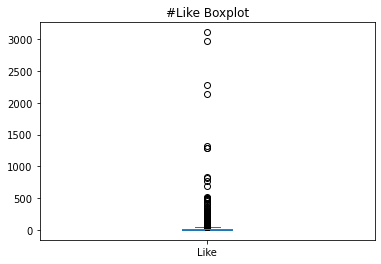

In [36]:
BoxPlot_Like = Table_1['Like'].plot(kind='box', title = '#Like Boxplot')

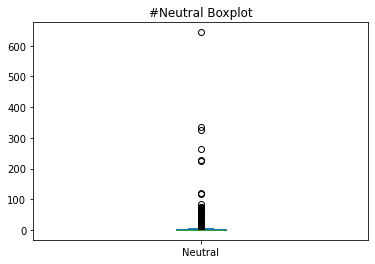

In [37]:
BoxPlot_Neutral = Table_1['Neutral'].plot(kind = 'box', title = '#Neutral Boxplot')

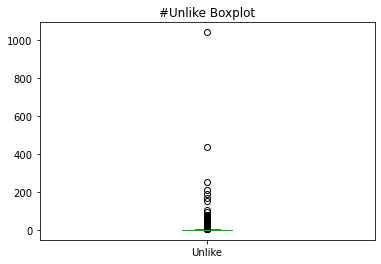

In [38]:
BoxPlot_Unlike = Table_1['Unlike'].plot(kind = 'box', title = '#Unlike Boxplot')

### Adding Global Appreciation to the Table

In [39]:
#Final Appreciation given to each book
Table_1['Global_Appreciation']  = Table_1[['Like','Neutral','Unlike']].idxmax(axis=1)

In [40]:
Table_1

,Book_IDs,Like,Neutral,Unlike,Mean,Global_Appreciation
0,000100039X,188,8,10,68.666667,Like
1,0001055178,12,2,0,4.666667,Like
2,0001473123,15,0,0,5.0,Like
3,0001473727,0,0,0,0.0,Like
4,0001473905,0,1,0,0.333333,Neutral
...,...,...,...,...,...,...
2636,0060534095,5,0,0,1.666667,Like
2637,0060534214,41,4,10,18.333333,Like
2638,0060534249,29,5,4,12.666667,Like
2639,0060534389,53,9,4,22.0,Like


### Top-100 Ranking Tables for each global appreciation

In [41]:
#Create a new dataframe which contain the top-100 books with global appreciation = Like
Table_Like = Table_1[Table_1.Global_Appreciation == 'Like'].sort_values("Like", ascending=False)
Book_IDs_Like = Table_Like[['Book_IDs', 'Like', 'Neutral', 'Unlike', 'Global_Appreciation']].head(100)
Book_IDs_Like

,Book_IDs,Like,Neutral,Unlike,Global_Appreciation
591,0007442920,3108,325,166,Like
552,0007386648,2972,119,79,Like
11,0002007770,2282,227,212,Like
593,0007444117,2134,644,1043,Like
1552,0060098902,1323,226,152,Like
...,...,...,...,...,...
159,000649885X,125,16,11,Like
833,0027109917,124,10,0,Like
576,0007431201,124,15,3,Like
317,0007169914,124,4,2,Like


In [42]:
#Create a new dataframe which contain the top-100 books with global appreciation = Neutral
Table_Neutral = Table_1[Table_1.Global_Appreciation == 'Neutral'].sort_values("Neutral", ascending=False)
Book_IDs_Neutral = Table_Neutral[['Book_IDs', 'Neutral', 'Like', 'Unlike', 'Global_Appreciation']].head(100)
Book_IDs_Neutral

,Book_IDs,Neutral,Like,Unlike,Global_Appreciation
670,000752417X,35,22,15,Neutral
1912,0060196742,10,9,3,Neutral
1308,0060009829,10,7,4,Neutral
145,000648204X,7,5,5,Neutral
1771,0060187646,6,5,0,Neutral
...,...,...,...,...,...
311,0007165641,1,0,0,Neutral
2452,0060521260,1,0,0,Neutral
74,0004126483,1,0,0,Neutral
2545,0060527129,1,0,0,Neutral


In [43]:
#Create a new dataframe which contain the top-100 books with global appreciation = Unlike
Table_Unlike = Table_1[Table_1.Global_Appreciation == 'Unlike'].sort_values("Unlike", ascending=False)
Book_IDs_Unlike = Table_Unlike[['Book_IDs', 'Unlike', 'Like', 'Neutral', 'Global_Appreciation']].head(100)
Book_IDs_Unlike

,Book_IDs,Unlike,Like,Neutral,Global_Appreciation
437,0007267622,105,89,50,Unlike
1359,0060014342,61,27,28,Unlike
1881,0060195347,37,28,12,Unlike
2570,006052846X,28,0,1,Unlike
175,0006514359,27,13,5,Unlike
...,...,...,...,...,...
697,0020080956,2,0,0,Unlike
801,0025229109,2,0,1,Unlike
976,0028639189,2,0,1,Unlike
1187,0060000805,2,0,1,Unlike


### Visualizing top datasets

In [44]:
#Concatenation of all the tables together
Top_100 = pd.concat([Table_Like, Table_Neutral, Table_Unlike], axis=0)

In [45]:
Top_100

,Book_IDs,Like,Neutral,Unlike,Mean,Global_Appreciation
591,0007442920,3108,325,166,1199.666667,Like
552,0007386648,2972,119,79,1056.666667,Like
11,0002007770,2282,227,212,907.0,Like
593,0007444117,2134,644,1043,1273.666667,Like
1552,0060098902,1323,226,152,567.0,Like
...,...,...,...,...,...,...
697,0020080956,0,0,2,0.666667,Unlike
801,0025229109,0,1,2,1.0,Unlike
976,0028639189,0,1,2,1.0,Unlike
1187,0060000805,0,1,2,1.0,Unlike


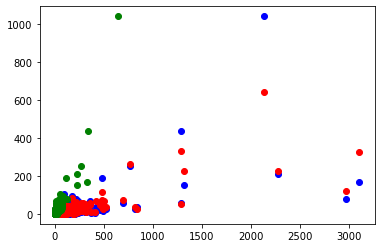

In [47]:
axe_1 = plt.scatter(x=Top_100['Like'], y=Top_100['Unlike'], c='Blue')
axe_2 = plt.scatter(x=Top_100['Like'], y=Top_100['Neutral'], c='Red')
axe3 = plt.scatter(x=Top_100['Neutral'], y=Top_100['Unlike'], c = 'Green')

## 3 - Clustering

### 3-Means Clustering

In [226]:
X = Top_100.loc[:, ['Like', 'Neutral', 'Unlike', 'Mean']].values
kmeans = KMeans(n_clusters = 3, random_state=0).fit(X)

In [227]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0])

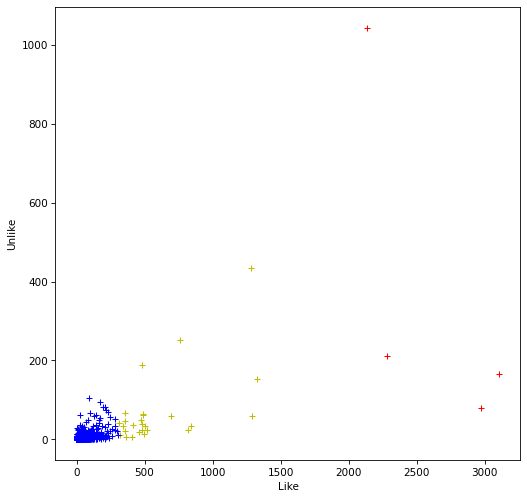

In [228]:
fig = plt.figure(dpi=75, figsize=(8, 8))
axe = fig.add_subplot(111)
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        axe.plot(X[i, 0], X[i,2], '+', color='b', mfc='none')
    elif kmeans.labels_[i] == 1:
        axe.plot(X[i, 0], X[i,2], '+', color='y')
    else:
        axe.plot(X[i, 0], X[i,2], '+', color='r')
axe.set_xlabel('Like')
axe.set_ylabel('Unlike')
plt.show()

In [129]:
#Evaluated the quality of the 3-Means clustering
sklearn.metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean', sample_size = None, random_state = None)

0.9435745830301242

### Hierarchical Clustering

In [130]:
Y = Top_100.loc[:, ['Like', 'Neutral', 'Unlike', 'Mean']].values
clustering = AgglomerativeClustering().fit(Y)

In [135]:
arr1 = np.array(clustering.labels_)
np.unique(arr1, return_counts=True)

(array([0, 1], dtype=int64), array([  11, 2630], dtype=int64))

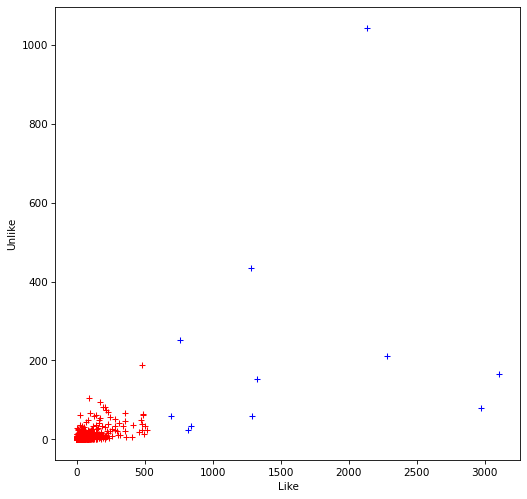

In [133]:
fig = plt.figure(dpi=75, figsize=(8, 8))
axe = fig.add_subplot(111)
for i in range(len(clustering.labels_)):
    if clustering.labels_[i] == 0:
        axe.plot(Y[i, 0], Y[i, 2], '+', color='b', mfc='none')
    else:
        axe.plot(Y[i, 0], Y[i, 2], '+', color='r')
axe.set_xlabel('Like')
axe.set_ylabel('Unlike')
plt.show()

In [140]:
#Evaluated the quality of the Hierarchical clustering
sklearn.metrics.silhouette_score(Y, clustering.labels_, metric = 'euclidean', sample_size = None, random_state = None)

0.9759584005517976

### Markov-graph Clustering

In [115]:
from sklearn.cluster import DBSCAN

clustering1 = DBSCAN(eps = 3).fit(Y)

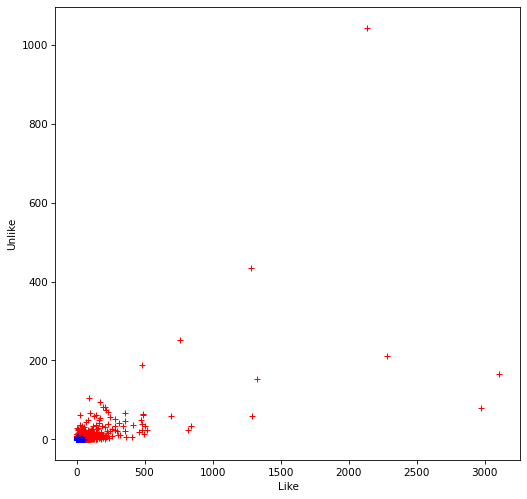

In [157]:
fig = plt.figure(dpi=75, figsize=(8, 8))
axe = fig.add_subplot(111)
for i in range(len(clustering.labels_)):
    if clustering1.labels_[i] == 3:
        axe.plot(Y[i, 0], Y[i, 2], '+', color='b', mfc='none')
    else:
        axe.plot(Y[i, 0], Y[i, 2], '+', color='r')
axe.set_xlabel('Like')
axe.set_ylabel('Unlike')
plt.show()

In [118]:
#Evaluated the quality of the Markov graph clustering 
sklearn.metrics.silhouette_score(Y, clustering1.labels_, metric = 'euclidean', sample_size = None, random_state = None)

0.5584581412367989

### Euclidian Distance

In [280]:
kmeans.cluster_centers_

array([[1.98395251e+01, 2.94101877e+00, 2.09038682e+00, 8.29031023e+00],
       [5.81461538e+02, 7.54230769e+01, 6.96153846e+01, 2.42166667e+02],
       [2.62400000e+03, 3.28750000e+02, 3.75000000e+02, 1.10925000e+03]])

In [264]:
#Create lists of distances of books to each cluster center
cluster_1 = []
for i in range(len(X)):
    cluster_1.append(math.dist(kmeans.cluster_centers_[0], X[i]))

cluster_2 = []
for i in range(len(X)):
    cluster_2.append(math.dist(kmeans.cluster_centers_[1], X[i]))
    
cluster_3 = []
for i in range(len(X)):
    cluster_3.append(math.dist(kmeans.cluster_centers_[2], X[i]))   

In [266]:
#Create a dataframe with all the previously created lists as columns
distances = pd.DataFrame(list(zip(Book_IDs, cluster_1, cluster_2, cluster_3)),
               columns =['Book_IDs', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

In [267]:
#Table that stores dustance from each book to each cluster
distances

,Book_IDs,Cluster 1,Cluster 2,Cluster 3
0,000100039X,3329.669817,2715.102481,534.907689
1,0001055178,3135.877745,2525.880323,505.450363
2,0001473123,2453.428946,1837.684239,441.351476
3,0001473727,2750.509276,2178.330841,901.520606
4,0001473905,1443.125754,827.560644,1430.707037
...,...,...,...,...
2636,0060534095,21.456571,637.714867,2891.632509
2637,0060534214,21.225718,637.471189,2891.391209
2638,0060534249,21.225718,637.471189,2891.391209
2639,0060534389,21.225718,637.471189,2891.391209


In [276]:
#Associate to each its closest cluster
distances['Label']=distances[['Cluster 1','Cluster 2','Cluster 3']].idxmin(axis=1)

In [277]:
distances

,Book_IDs,Cluster 1,Cluster 2,Cluster 3,Label
0,000100039X,3329.669817,2715.102481,534.907689,Cluster 3
1,0001055178,3135.877745,2525.880323,505.450363,Cluster 3
2,0001473123,2453.428946,1837.684239,441.351476,Cluster 3
3,0001473727,2750.509276,2178.330841,901.520606,Cluster 3
4,0001473905,1443.125754,827.560644,1430.707037,Cluster 2
...,...,...,...,...,...
2636,0060534095,21.456571,637.714867,2891.632509,Cluster 1
2637,0060534214,21.225718,637.471189,2891.391209,Cluster 1
2638,0060534249,21.225718,637.471189,2891.391209,Cluster 1
2639,0060534389,21.225718,637.471189,2891.391209,Cluster 1


In [283]:
XX = distances.loc[:, ['Cluster 1', 'Cluster 2', 'Cluster 3']].values
kmeans2 = KMeans(n_clusters = 3, random_state=0).fit(XX)

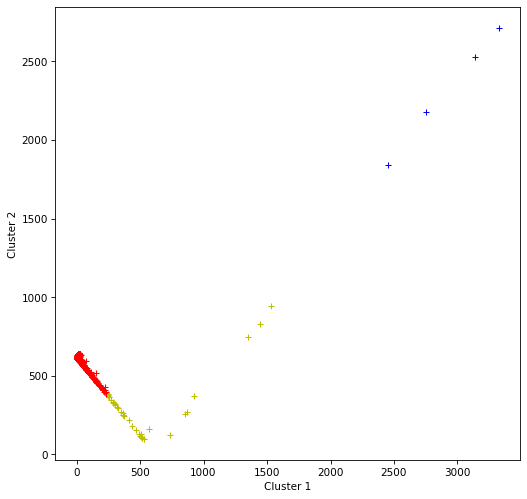

In [289]:
fig = plt.figure(dpi=75, figsize=(8, 8))
axe = fig.add_subplot(111)
for i in range(len(kmeans2.labels_)):
    if kmeans2.labels_[i] == 0:
        axe.plot(XX[i, 0], XX[i,1], '+', color='r', mfc='none')
    elif kmeans2.labels_[i] == 1:
        axe.plot(XX[i, 0], XX[i,1], '+', color='b')
    else:
        axe.plot(XX[i, 0], XX[i,1], '+', color='y')
axe.set_xlabel('Cluster 1')
axe.set_ylabel('Cluster 2')
plt.show()

In [290]:
#Evaluated the quality of the clustering
sklearn.metrics.silhouette_score(XX, kmeans2.labels_, metric = 'euclidean', sample_size = None, random_state = None)

0.9374137499165408